
# Experimento TCL (Teorema do Limite Central)

## Nome: Morsinaldo de Azevedo Medeiros

**Objetivo geral.** Mostrar que a convolução de diferentes distribuições de variáveis aleatórias independentes aproxima uma distribuição normal. Para isso, serão seguidos os seguintes passos:

1. **Gerar e visualizar** quatro distribuições diferentes média zero e variâncias diferentes.
2. **Explicar** a ideia de **convolução** (soma de variáveis independentes) e seu uso neste trabalho.
3. **Aplicar convoluções** separadamente em cada distribuição (i.i.d.) e visualizar os resultado.
4. **Alinhar as variâncias** (padronizar cada distribuição para a **mesma variância-alvo**), e então visualizar as distribuições alinhadas.



In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


## Parâmetros do experimento

- `RNG_SEED`: semente do gerador (reprodutibilidade).
- `N_SAMPLES`: número de amostras por distribuição.
- `BINS`: número de bins nos histogramas.
- `NS_RAW`: valores de `n` (quantidade de somas independentes) usados nas convoluções separadas.
- `SIGMA2_TGT`: variância-alvo usada depois para alinhar (padronizar) as distribuições.


In [2]:
RNG_SEED   = 42
N_SAMPLES  = 10_000_000
BINS       = 500
SIGMA2_TGT = 1.0

rng = np.random.default_rng(RNG_SEED)

def stats(x):
    """Retorna média e variância de x"""
    return float(np.mean(x)), float(np.var(x))

def plot_hist(x, title, bins=BINS):
    """Plota histograma de x com título e número de bins especificados"""
    # 1 plot por figura, sem seaborn, sem cores explícitas
    plt.figure(figsize=(8,5))
    plt.hist(x, bins=bins, density=True, alpha=0.7)
    plt.title(title)
    plt.xlabel("valor"); plt.ylabel("densidade")
    plt.tight_layout(); plt.show()

def normal_pdf(x, mu=0.0, var=1.0):
    """Retorna valor da função densidade de probabilidade da normal N(mu, var) em x"""
    return (1.0 / math.sqrt(2.0*math.pi*var)) * np.exp(-0.5*((x-mu)**2)/var)



## Distribuições brutas (variâncias diferentes)

Definições e variâncias teóricas


## Distribuição Uniforme

**Definição:**  
$$ 
U(-2,2) 
$$  

**Média teórica:**  
$$ 
\mathbb{E}[X] = \frac{a+b}{2} = 0 
$$  

**Variância teórica:**  
$$ 
\mathrm{Var}(X) = \frac{(b - a)^2}{12} = \frac{(2 - (-2))^2}{12} = \frac{16}{12} = \frac{4}{3} 
$$

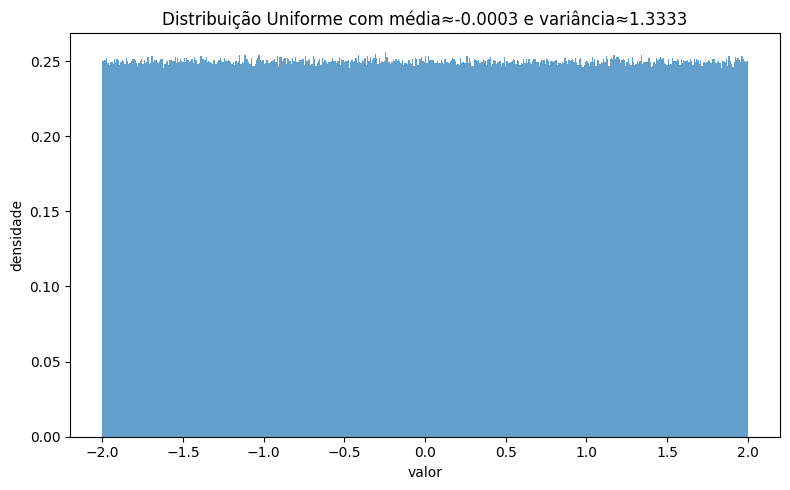

In [3]:
# Gerando a distribuição uniforme
U = rng.uniform(-2.0, 2.0, size=N_SAMPLES)

# Calculando a média e a variância calculada
m, v = stats(U)

# plotando o resultado
plot_hist(U, f"Distribuição Uniforme com média≈{round(m,4)} e variância≈{round(v,4)}")

## Distribuição Exponencial (centrada)

**Definição:**  
$$ 
Y \sim \mathrm{Exp}(\lambda = 2) 
$$  

Transformamos em:  
$$ 
X = Y - \frac{1}{2} 
$$  

**Média teórica:**  
$$ 
\mathbb{E}[X] = 0 
$$  

**Variância teórica:**  
$$ 
\mathrm{Var}(X) = \frac{1}{\lambda^2} = \frac{1}{4} 
$$

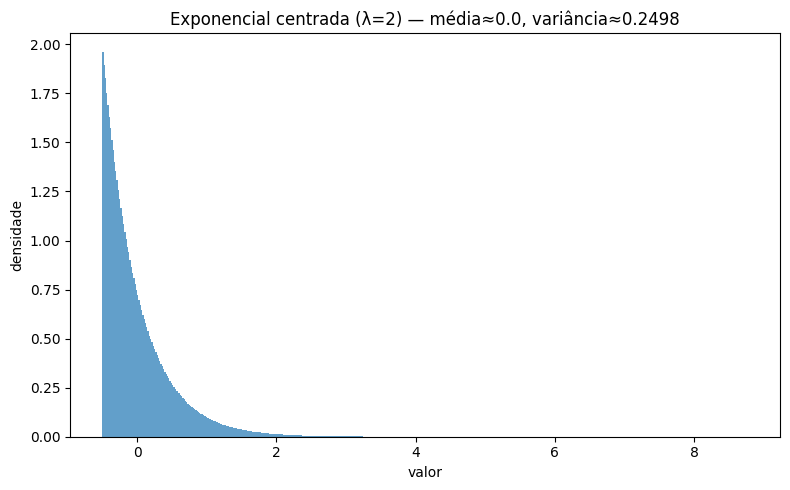

In [4]:
E = rng.exponential(1/2, size=N_SAMPLES) - 0.5
m, v = stats(E)
plot_hist(E, f"Exponencial centrada (λ=2) — média≈{round(m,4)}, variância≈{round(v,4)}")

## Distribuição Laplace

**Definição:**  
$$ 
X \sim \mathrm{Laplace}(0, b = 2) 
$$  

**Média teórica:**  
$$ 
\mathbb{E}[X] = 0 
$$  

**Variância teórica:**  
$$ 
\mathrm{Var}(X) = 2b^2 = 2 \cdot 2^2 = 8 
$$

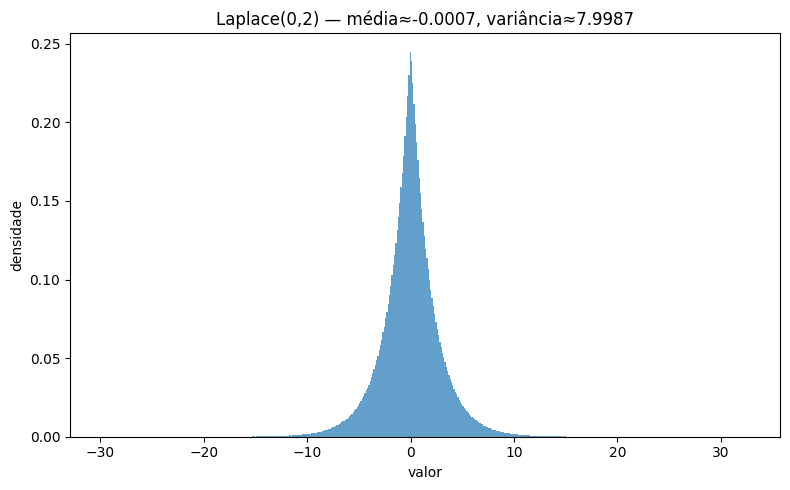

In [5]:
L = rng.laplace(0.0, 2.0, size=N_SAMPLES)
m, v = stats(L)
plot_hist(L, f"Laplace(0,2) — média≈{round(m,4)}, variância≈{round(v,4)}")

## Distribuição Triangular

**Definição:**  
$$
X \sim \mathrm{Triangular}(-1,\,0,\,1)
$$

**Média teórica:**  
$$
\mathbb{E}[X] = 0
$$

**Variância teórica:**  
$$
\mathrm{Var}(X) = \frac{1}{9}
$$


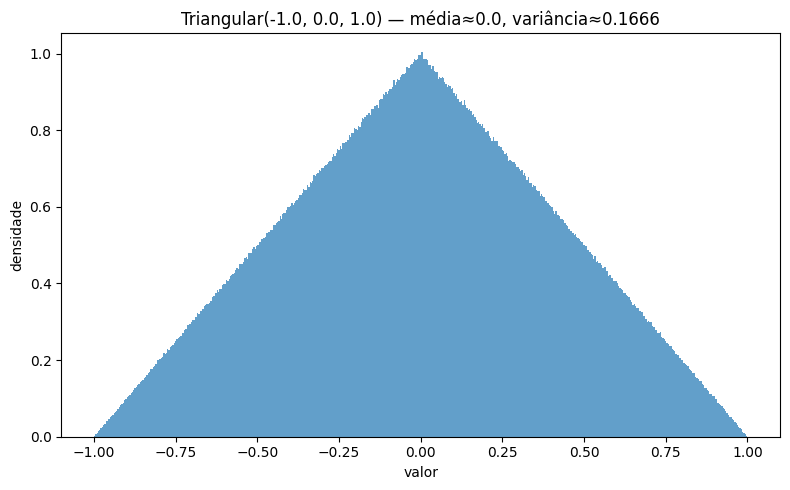

In [6]:
left = -1.0
mode = 0.0
right = 1.0

T = rng.triangular(left=left, mode=mode, right=right, size=N_SAMPLES)

m, v = stats(T)

plot_hist(
    T,
    f"Triangular({left}, {mode}, {right}) — média≈{round(m,4)}, variância≈{round(v,4)}"
)

## Convolução (somas independentes e normalização)

Dado um conjunto i.i.d. $(X_1,\ldots,X_n)$ com média $( \mu )$ e variância $( \sigma^2 )$, definimos:

- Para variáveis já centradas (\(\mu=0\)):
$$
S_n \;=\; \frac{X_1 + \cdots + X_n}{\sqrt{n}}
\quad\Longrightarrow\quad
\mathbb{E}[S_n]=0,\;\; \mathrm{Var}(S_n)=\sigma^2.
$$

Pelo TCL, $(S_n)$ tende a uma gaussiana quando $(n)$ cresce (desde que $(\sigma^2 < \infty)$).
Abaixo, mostramos um único caso fixo de convolução para cada distribuição.

### Uniforme: soma e normalização

Para $X_i \sim U(-2,2)$, temos:
- $( \mathbb{E}[X_i] = 0 )$
- $( \mathrm{Var}(X_i) = \frac{(2 - (-2))^2}{12} = \frac{16}{12} = \frac{4}{3} )$

Definimos:
$$
S_n \;=\; \frac{X_1 + \cdots + X_n}{\sqrt{n}}
\quad\Rightarrow\quad
\mathrm{Var}(S_n) = \frac{4}{3}.
$$

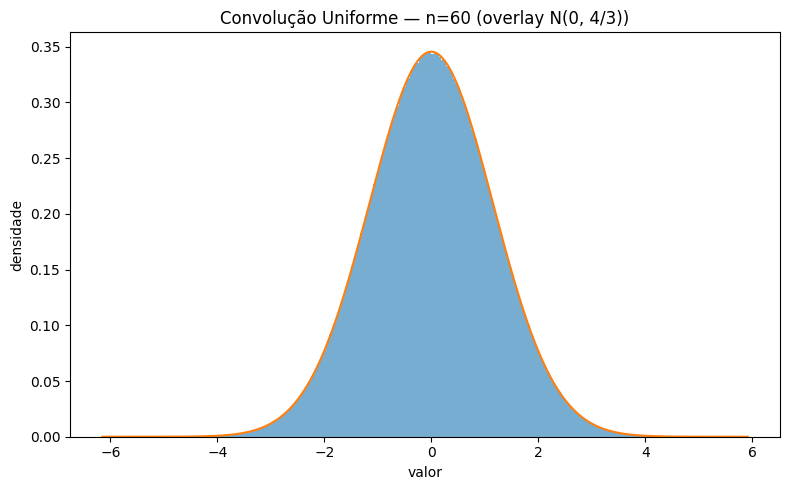

In [ ]:
n = 60 # numero de convoluções
U_mat = rng.uniform(-2.0, 2.0, size=(N_SAMPLES, n))
Sn_uni = U_mat.sum(axis=1) / np.sqrt(n)

# Normal(0, 4/3)
plt.figure(figsize=(8,5))
counts, edges, _ = plt.hist(Sn_uni, bins=BINS, density=True, alpha=0.6)
xs = np.linspace(edges[0], edges[-1], 800)
plt.plot(xs, (1.0/np.sqrt(2*np.pi*(4/3))) * np.exp(-(xs**2)/(2*(4/3))))
plt.title(f"Convolução Uniforme — n={n} (N(0, 4/3))")
plt.xlabel("valor"); plt.ylabel("densidade"); plt.tight_layout(); plt.show()

### Exponencial centrada: soma e normalização

Se $Y_i \sim \mathrm{Exp}(2)$, então $X_i = Y_i - \tfrac{1}{2}$ tem:
- $ \mathbb{E}[X_i] = 0 $
- $ \mathrm{Var}(X_i) = \tfrac{1}{4} $

Definimos:
$$
S_n \;=\; \frac{X_1 + \cdots + X_n}{\sqrt{n}}
\quad\Rightarrow\quad
\mathrm{Var}(S_n) = \tfrac{1}{4}.
$$

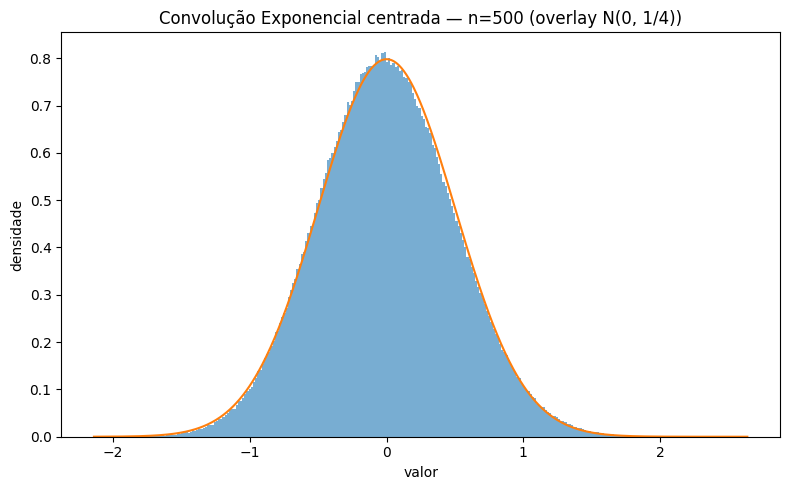

In [ ]:
# Exponencial centrada (λ=2) — S_n = (X1+...+Xn)/√n
n = 500 # numero de convoluções
# M = N_SAMPLES
M = 1_000_000

E_mat = rng.exponential(1/2, size=(M, n)) - 0.5
Sn_exp = E_mat.sum(axis=1) / np.sqrt(n)

# Teórico: Var(S) = 1/4
var_ref = 0.25
bins = 300 

plt.figure(figsize=(8,5))
plt.hist(Sn_exp, bins=bins, density=True, alpha=0.6)
xs = np.linspace(np.min(Sn_exp), np.max(Sn_exp), 800)
plt.plot(xs, (1.0/np.sqrt(2*np.pi*var_ref)) * np.exp(-(xs**2)/(2*var_ref)))
plt.title(f"Convolução Exponencial centrada — n={n} (N(0, 1/4))")
plt.xlabel("valor"); plt.ylabel("densidade"); plt.tight_layout(); plt.show()

Uma dificuldade para esse caso foi a necessidade de um grande número de convoluções para a aproximar para a Normal. Então, resolvi diminuir o número de pontos, por questões de limitações computacionais.

### Laplace: soma e normalização

Para $X_i \sim \mathrm{Laplace}(0, b=2)$, temos:
- $ \mathbb{E}[X_i] = 0 $
- $ \mathrm{Var}(X_i) = 2b^2 = 8 $

Definimos:
$$
S_n \;=\; \frac{X_1 + \cdots + X_n}{\sqrt{n}}
\quad\Rightarrow\quad
\mathrm{Var}(S_n) = 8.
$$

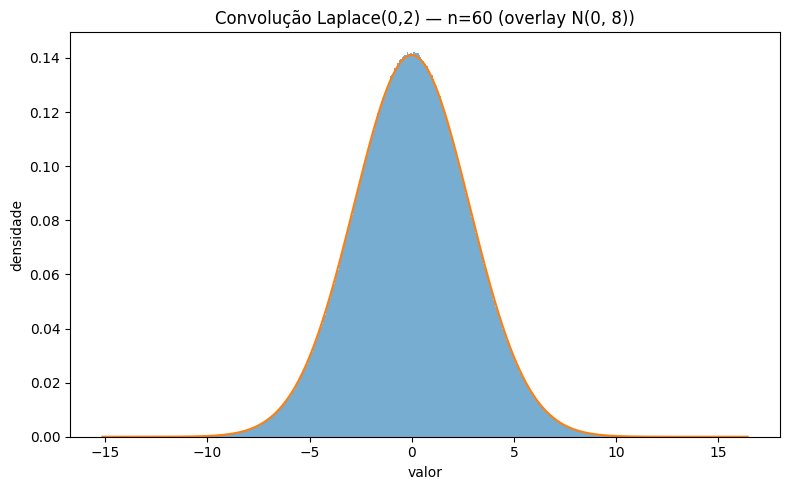

In [ ]:
n = 60 # numero de convoluções
L_mat = rng.laplace(0.0, 2.0, size=(N_SAMPLES, n))
Sn_lap = L_mat.sum(axis=1) / np.sqrt(n)

# Normal(0, 8)
plt.figure(figsize=(8,5))
counts, edges, _ = plt.hist(Sn_lap, bins=BINS, density=True, alpha=0.6)
xs = np.linspace(edges[0], edges[-1], 800)
plt.plot(xs, (1.0/np.sqrt(2*np.pi*8.0)) * np.exp(-(xs**2)/(2*8.0)))
plt.title(f"Convolução Laplace(0,2) — n={n} (N(0, 8))")
plt.xlabel("valor"); plt.ylabel("densidade"); plt.tight_layout(); plt.show()

### Triangular: soma, centralização e normalização

Para $(X_i \sim \mathrm{Triangular}(-1,0,1))$:

- $( \mathbb{E}[X_i] = 0 )$  
- $( \mathrm{Var}(X_i) = \frac{1}{9} )$

A soma de $(n)$ variáveis triangulares independentes é

$$
S_n = X_1 + \cdots + X_n
$$

Com média e variância:

$$
\mathbb{E}[S_n] = n \cdot 0 = 0, 
\qquad 
\mathrm{Var}(S_n) = n \cdot \frac{1}{9} = \frac{n}{9}
$$

A forma centralizada e normalizada é:

$$
Z_n
=
\frac{S_n - 0}{\sqrt{n/9}}
=
\frac{S_n}{\sqrt{n/9}}
$$

Assim,

$$
Z_n \xrightarrow{d} \mathcal{N}(0,1)
$$

ou seja, conforme $(n)$ cresce, a distribuição da soma padronizada se aproxima da Normal padrão, ilustrando o Teorema do Limite Central para variáveis contínuas não-Gaussianas.

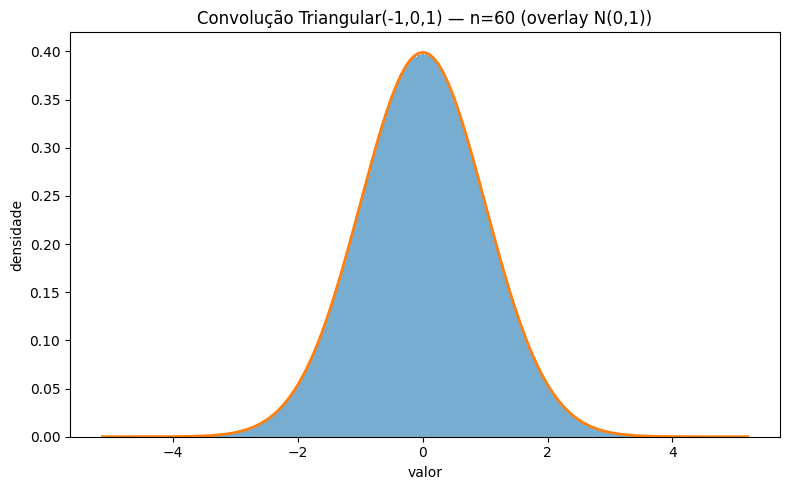

In [ ]:
# parâmetros
n = 60 # numero de convoluções
T_mat = rng.triangular(-1.0, 0.0, 1.0, size=(N_SAMPLES, n))
Sn_tri = T_mat.sum(axis=1) / np.sqrt(n)  

mu_hat = Sn_tri.mean()
sd_hat = Sn_tri.std(ddof=0)
Z = (Sn_tri - mu_hat) / sd_hat

# plot
plt.figure(figsize=(8,5))
counts, edges, _ = plt.hist(Z, bins=BINS, density=True, alpha=0.6)
xs = np.linspace(edges[0], edges[-1], 800)
norm_pdf = (1.0/np.sqrt(2*np.pi)) * np.exp(-(xs**2)/2)
plt.plot(xs, norm_pdf, linewidth=2)
plt.title(f"Convolução Triangular(-1,0,1) — n={n} (N(0,1))")
plt.xlabel("valor"); plt.ylabel("densidade"); plt.tight_layout(); plt.show()

## Distribuições convoluídas com variâncias diferentes

Após realizarmos as convoluções (somas) das diferentes distribuições com média 0,
observamos que todas tenderam a uma forma gaussiana, mas com larguras diferentes.

Essa diferença de “largura” (dispersão) se deve ao fato de que, mesmo após a normalização
por  $\sqrt{n}$, a variância resultante da soma continua sendo igual à variância original
de cada distribuição.

Em outras palavras, o Teorema do Limite Central garante a convergência de forma (para o formato gaussiano), mas não de escala — a variância depende da distribuição de origem.

## Por que as variâncias continuam diferentes?

Considere $ X_1, X_2, \ldots, X_n $ variáveis independentes e identicamente distribuídas
com média $ \mathbb{E}[X_i] = 0 $ e variância $ \mathrm{Var}(X_i) = v $.

Definimos a soma normalizada:

$$
S_n = \frac{X_1 + X_2 + \cdots + X_n}{\sqrt{n}}.
$$

A variância de $ S_n $ é:

$$
\mathrm{Var}(S_n) = \frac{1}{n}\,\mathrm{Var}(X_1 + \cdots + X_n)
= \frac{1}{n} \, n v = v.
$$

Portanto, mesmo após a normalização por $ \sqrt{n} $,
a variância final de cada soma continua sendo a variância original $ v $.

É por isso que, nas convoluções observadas, cada distribuição manteve uma “largura” diferente:
- Uniforme → $ v = \frac{4}{3} $
- Exponencial centrada → $ v = \frac{1}{4} $
- Laplace → $ v = 8 $
- Triangular → $ v = \frac{1}{9} $

## O que significa alinhar as variâncias?

Para podermos comparar as distribuições convoluídas entre si na mesma escala,
precisamos que todas tenham a mesma variância final (por exemplo, $ \sigma^2 = 1 $).

Isso é feito aplicando um reescale (mudança de unidade) no resultado da convolução $ S_n $:

$$
\tilde{S}_n = \frac{S_n}{\sqrt{v_{\text{original}}}} \, \sqrt{\sigma^2_{\text{alvo}}}.
$$

Como geralmente escolhemos $ \sigma^2_{\text{alvo}} = 1 $, a fórmula se simplifica para:

$$
\tilde{S}_n = \frac{S_n}{\sqrt{v_{\text{original}}}}.
$$

Assim, garantimos que:

$$
\mathrm{Var}(\tilde{S}_n) = 1,
\quad \text{para todas as distribuições.}
$$

## Aplicando o alinhamento de variância

Abaixo estão as variâncias originais e os fatores de correção usados:

| Distribuição | Variância original $v$ | Fator de escala $1/\sqrt{v}$ |
|--------------|-------------------------|--------------------------------|
| Uniforme $(-2,2)$ | $ \frac{4}{3} \approx 1.33 $ | $ \frac{1}{\sqrt{4/3}} \approx 0.866 $ |
| Exponencial centrada ($\lambda = 2$) | $ \frac{1}{4} = 0.25 $ | $ \frac{1}{\sqrt{1/4}} = 2 $ |
| Laplace $(0,2)$ | $ 8 $ | $ \frac{1}{\sqrt{8}} \approx 0.3536 $ |
| Triangular $(-1,0,1)$ | $ \frac{1}{6} \approx 0.1667 $ | $ \frac{1}{\sqrt{1/6}} \approx 2.449 $ |

Ao multiplicarmos cada distribuição convoluída $S_n$ pelo respectivo fator acima,
elas passam a ter variância ≈ 1 e podem ser comparadas no mesmo gráfico.

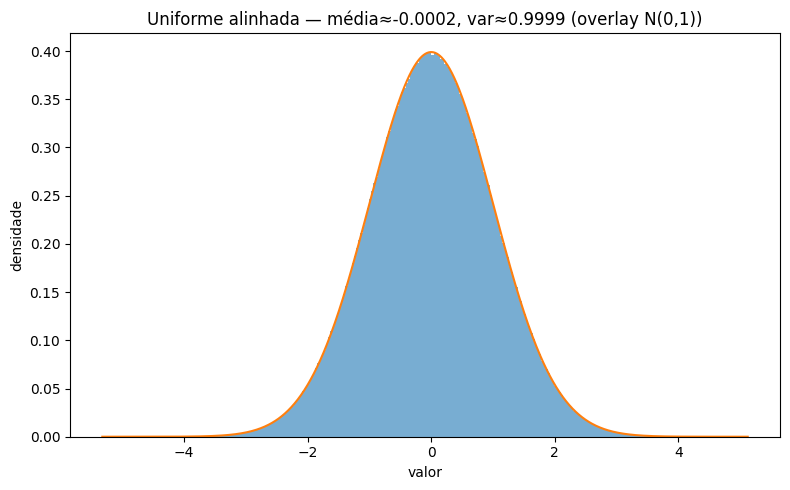

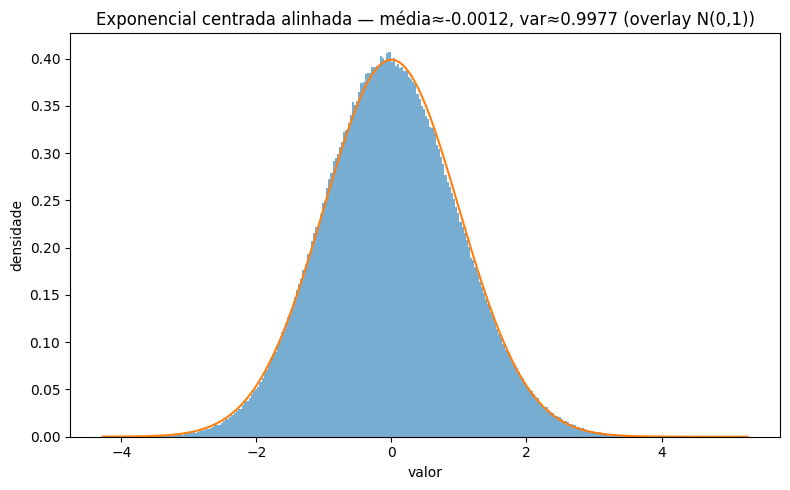

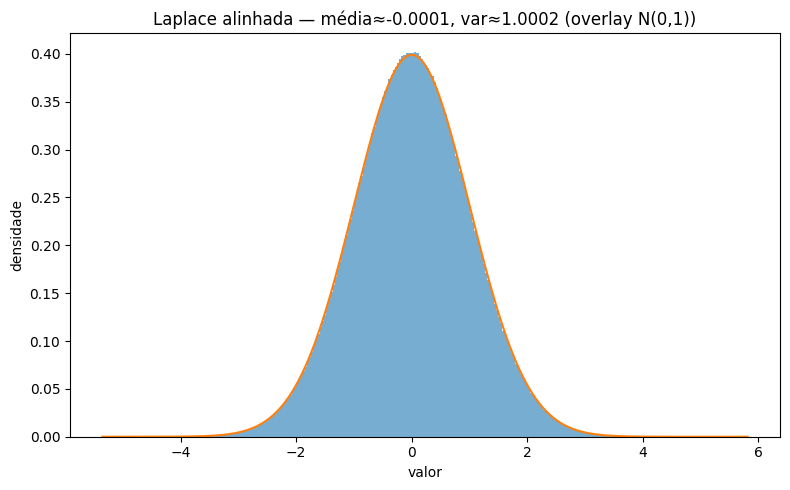

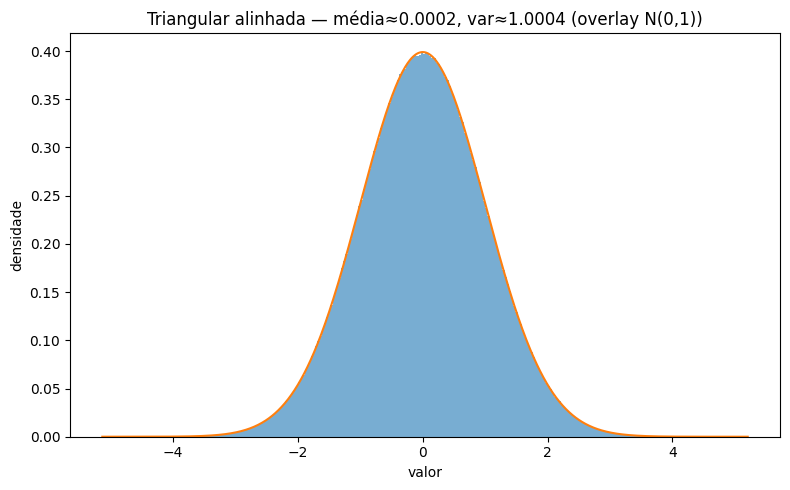

In [ ]:
def align_variance(Sn, v_base, tau2=1.0):
    """Recebe S_n já com /sqrt(n). v_base é a variância da distribuição original."""
    return Sn / np.sqrt(v_base) * np.sqrt(tau2)


def align_variance(Sn, v_base, tau2=1.0):
    """Recebe S_n já com /sqrt(n). v_base = variância da distribuição original."""
    return Sn / math.sqrt(v_base) * math.sqrt(tau2)

def overlay_normal01(x, title, bins=300):
    m, v = float(np.mean(x)), float(np.var(x))
    plt.figure(figsize=(8,5))
    plt.hist(x, bins=bins, density=True, alpha=0.6)
    xs = np.linspace(np.min(x), np.max(x), 800)
    plt.plot(xs, (1/np.sqrt(2*np.pi))*np.exp(-0.5*xs*xs))
    plt.title(f"{title} — média≈{m:.4f}, var≈{v:.4f} (N(0,1))")
    plt.xlabel("valor"); plt.ylabel("densidade"); plt.tight_layout(); plt.show()

# Alinhar cada S_n ao alvo τ²=1
S_unif_al = align_variance(Sn_uni, v_base=4/3, tau2=1.0)
S_exp_al  = align_variance(Sn_exp, v_base=1/4, tau2=1.0)
S_lap_al  = align_variance(Sn_lap, v_base=8,   tau2=1.0)
S_tri_al  = align_variance(Sn_tri, v_base=1/6, tau2=1.0)

# Overlays finais
overlay_normal01(S_unif_al, "Uniforme alinhada")
overlay_normal01(S_exp_al,  "Exponencial centrada alinhada")
overlay_normal01(S_lap_al,  "Laplace alinhada")
overlay_normal01(S_tri_al,  "Triangular alinhada")

## Resultados após o alinhamento das variâncias

Após o alinhamento:

- Todas as distribuições apresentam média ≈ 0 e variância ≈ 1, confirmando que o reescalonamento foi feito de forma bem-sucedida.

- A forma das curvas torna-se muito semelhante entre si e se aproxima da $ \mathcal{N}(0,1) $.

Algumas pequenas diferenças ainda podem se observadas, principalmente na exponencial que foi a que se teve a maior dificuldade de se aproximar. Essas diferenças são esperadas e diminuem conforme $n$ aumenta, pois o Teorema do Limite Central garante apenas a convergência assintótica.


## Conclusão

Cada distribuição, ao ser convoluída, aproxima-se de uma forma gaussiana, mas com variância proporcional à variância original das variáveis somadas.

Somente após dividir o resultado da soma por $ \sqrt{v_{\text{original}}} $
é que obtemos distribuições com a mesma escala, todas aproximadamente
$ \mathcal{N}(0,1) $.

Assim, demonstramos que o Teorema do Limite Central controla o
formato da distribuição resultante, enquanto a amplitude
(variância) depende da variância de cada variável individual — sendo
padronizada apenas por um ajuste adicional.